In [1]:
!pip install sounddevice

In [2]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 1s (106 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155455 files

In [3]:
!pip install pycryptodome

     |████████████████████████████████| 2.0 MB 7.0 MB/s 


# Importing dependencies

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
#import sounddevice as sd

import random
import string
from Crypto.Cipher import DES

import IPython.display as ipd
import librosa
import librosa.display

## Taking input

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Text(0.5, 1.0, 'Original Audio Plot')

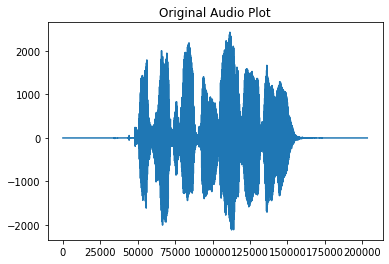

In [2]:
path='/content/drive/MyDrive/data_set/RAVDESS_song/Actor_01/03-02-01-01-01-01-01.wav'
fs, data = wavfile.read(path)
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [3]:
with open(path, 'rb') as fd:
    contents = fd.read()

In [4]:
contents

b'RIFFv\xe9\x06\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80\xbb\x00\x00\x00w\x01\x00\x02\x00\x10\x00FLLR\xcc\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

## Playing that sound

In [5]:
# Original Sound
samples, sample_rate = librosa.load(path)
ipd.Audio(samples, rate=sample_rate)

## Getting ready with DES

In [6]:
DES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8)) #x=64 bits #key=64 64BITS/8=8 BYTE

DES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))

In [7]:
print("AES Key is ", DES_KEY)
print("AES Initialization vector is ", DES_IV)

AES Key is  RsmGSYaK
AES Initialization vector is  ENu62xcj


## Encrpytion of audio file

In [8]:
encryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

## Saving the encrypted file

In [9]:
with open('/content/drive/MyDrive/crypto/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


## Loading encrypted file

In [10]:
with open('/content/drive/MyDrive/crypto/encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

In [11]:
contents

b'\xd7\xe6\xc2$\x13\x9a\x83>p\xca\x97\x0b\x1fA\x96\xe66*"\xa7J=\xc6I\xc8\xe2\x81\x88\x9cIQ\xd74rP\xeb\xa6\x8f,\x97\xd0\xcb\xae\xef\x0b\x945\xd4"\x1e,\x8f!\xf2h\xde\xdb\xa1Q\xe0\xba\x8b\xac\xba<\xcbRp\xed\xf7o\xa0\x1c^{\xf8\x8d \xb76M\x9e\x9c\x83h:\xfd]\xf6e\xa0\xa6\x82ST\x9ev\xe4\xf9\xad\xd4\xa0d\x87#q\xc3)&q\xab\x0f\xfe\x8c\xf8\x85GT\xd7\xcf\xees\x8bZ\xb7l\xa2rH|\xa6\xeaJ\xf0\x9b\xa5\x85\xdc*\xdd\xd3\xab\xce\x0fG\x9c-\xed\x8a\xa9|\x8dyA\x19\xa8\xf3~\xffM\xc3O\xa7\r\xa7\x0c[\xe7\xfa\xc0\x886\x08N8NCA\xd16h\xfa\x9e\xd2RQ\xab\t\xaa\x18\x9f\x00=\x8eo]<\xb8\x9d\xae\xae\x96\x02\xdf)P]\x8e\x9d(I\x81Y\xcbo\x8e\x10\x83\x05\xb2\xeaTx\xf7\t\r\x0c\x0c\x0b\xfd#\xeeS\xc2\xf1Gx\\TR\x88\xf2\x84\x93\xf2D\x1e*]\xb7\xf1C\xa1\xba)\xb5z\xcc\xa690\xeb\xe6\xf6\xfdD\x9cr.d/\t\xfbzD\xb9\xda\x92\x89>\xed\xe6\xca\xdf\xfdx.R\x1f\x18\x9cK!\x1f62S\xadf_\xb3!\xd0\xea\x8f\x1f0@\xf7\xf9\x1c\x07\x7f\xce$\x81\xbaA\xd2\\\xd8\xbc\x11\x01\xa5\xf3\xed<\x8d{0u\x83U\x10\x18\xcc`\x075\\\xaf\xb4a\xb0\x98>kU\xd0-\xe6(\xad4T\'"x

## Decryption of data

In [12]:
decryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [13]:
with open('/content/drive/MyDrive/crypto/decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


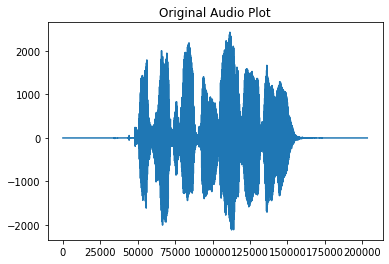

In [14]:
fs, data = wavfile.read('/content/drive/MyDrive/crypto/decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [15]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/crypto/decrypted_audio_file.wav')
ipd.Audio(samples, rate=sample_rate)